## Evolution of a state $\psi$

Quantum states evolve and their evolution can be described by Unitary Matries. 

A unitary matrix has the property that its conjugate transpose is its inverse. Formally, it means that a matrix $U$ is unitary if 

$UU^\dagger=U^\dagger U=\mathbb{1}$

Pauli Spin Matrices are Unitary matrices. 

$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0|$

$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$

$Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1|$

We will now call them as X, Y and Z gates. 

Let's check if they are indeed Unitary.

In [1]:
#!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [2]:
import numpy as np
from qiskit_textbook.tools import array_to_latex
Y=np.array([[0,complex(0,-1)],[complex(0,1),0]])
#print ('Y:',Y)
print (array_to_latex(Y,pretext="\\text{Y = } "))
Y_dag= Y.conj().transpose()
print (array_to_latex(Y_dag, pretext="\\text{Y_dag = } "))
A=np.dot(Y,Y_dag)
#print ('A:',A)
print (array_to_latex(A,pretext="\\text{A = } "))

<IPython.core.display.Math object>

None


<IPython.core.display.Math object>

None


<IPython.core.display.Math object>

None


Similary, you can show X and Z are unitary matrices too. 
The beauty of Unitary matrix is that the norm is reserved. That is a quantum state is mapped to another quantum state. 

The main beauty of unitary matrices or operation is reversibility. Quantum computing libraries often proved a function to reverse entire circuit. Reversing a gate is very simple: we just apply it again!

Let's check if this is true!

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import Aer
from qiskit.tools.visualization import circuit_drawer

In [4]:
# Calling a simulator to see what happened after applying the gate
backend_statevector = Aer.get_backend('statevector_simulator')
# create a quantum register and a classical register
q = QuantumRegister(1)
c = ClassicalRegister(1) #used to measure the result
circuit = QuantumCircuit(q, c) # Now we created a circuit
circuit.x(q[0]) # Applied a Pauli X-gate to q0
job = execute(circuit, backend_statevector)
print(array_to_latex(job.result().get_statevector(circuit),pretext="\\text{Psi after X-gate is applied = } "))
circuit.x(q[0]) # Apllied another Pauli X-gate to q
print(circuit.draw(style='mpl'))
job1 = execute(circuit, backend_statevector) # ran the job
#print("Psi after X-gate applied again:",job1.result().get_statevector(circuit))
print(array_to_latex(job1.result().get_statevector(circuit),pretext="\\text{Psi after X-gate is applied again = } "))

<IPython.core.display.Math object>

None
      ┌───┐┌───┐
q0_0: ┤ X ├┤ X ├
      └───┘└───┘
c0_0: ══════════
                


<IPython.core.display.Math object>

None


Let's see this mathematically:

$X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$

$X|1\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$

Quantum computing libraries often offer a variety of noise models that mimic different types of interaction, and increasing the strength of the interaction with the environment leads to faster decoherence. The timescale for decoherence is often called $T_2$ time. Among a couple of other parameters, $T_2$ time is critically important for the number of gates or the duration of the quantum computation we can perform.

A very cheap way of studying the effects of decoherence is mixing a pure state with the maximally mixed state $\mathbb{1}/2^d$, where $d$ is the number of qubits, with some visibility parameter in $[0,1]$. This way we do not have to specify noise models or any other map modelling decoherence. For instance, we can mix the $|\phi^+\rangle$ state with the maximally mixed state:

In [5]:
np.eye(4) # Creates an identity matrix of 4 X 4 

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [6]:
def mixed_state(pure_state, visibility):
    density_matrix = pure_state @ pure_state.T.conj()
    maximally_mixed_state = np.eye(4)/2**2
    return visibility*density_matrix + (1-visibility)*maximally_mixed_state

ϕ = np.array([[1],[0],[0],[1]])/np.sqrt(2)
#####################
print(array_to_latex(ϕ,pretext="\\text{ϕ = } "))
d_m= ϕ @ ϕ.T.conj()
print ('Density_matrix')
print (d_m)
###############################
print("Maximum visibility is a pure state:")
print(mixed_state(ϕ, 1.0))
#############################
print("The state is still entangled with visibility 0.8:")
print(mixed_state(ϕ, 0.8))
################################
print("Entanglement is lost by 0.6:")
print(mixed_state(ϕ, 0.6))
############################
print("Barely any coherence remains by 0.2:")
print(mixed_state(ϕ, 0.2))

<IPython.core.display.Math object>

None
Density_matrix
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
Maximum visibility is a pure state:
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
The state is still entangled with visibility 0.8:
[[0.45 0.   0.   0.4 ]
 [0.   0.05 0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.4  0.   0.   0.45]]
Entanglement is lost by 0.6:
[[0.4 0.  0.  0.3]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0. ]
 [0.3 0.  0.  0.4]]
Barely any coherence remains by 0.2:
[[0.3 0.  0.  0.1]
 [0.  0.2 0.  0. ]
 [0.  0.  0.2 0. ]
 [0.1 0.  0.  0.3]]


Another way to look at what happens to a quantum state in an open system is through equilibrium processes. Think of a cup of coffee: left alone, it will equilibrate with the environment, eventually reaching the temperature of the environment. This includes energy exchange. A quantum state does the same thing and the environment has a defined temperature, just like the environment of a cup of coffee.

The equilibrium state is called the thermal state. The samples pulled out of a thermal state follows a Boltzmann distribution. The Boltzmann -- also called Gibbs -- distribution is described as 

$P(E_i) =  \frac {e^{-E_{i}/T}}{\sum _{j=1}^{M}{e^{-E_{j}/T}}}$,

where $E_i$ is an energy, and $M$ is the total number of possible energy levels. Temperature enters the definition: the higher the temperature, the closer we are to the uniform distribution. In the infinite temperature limit, it recovers the uniform distribution. At high temperatures, all energy levels have an equal probability. In contrast, at zero temperature, the entire probability mass is concentrated on the lowest energy level, the ground state energy. To get a sense of this, let's plot the Boltzmann distribution with vastly different temperatures:

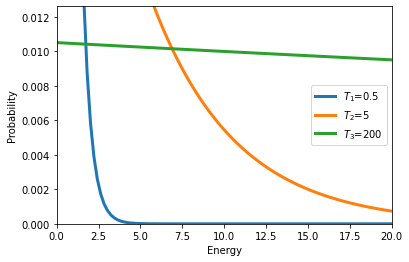

In [7]:
import matplotlib.pyplot as plt

temperatures = [.5, 5, 200]
energies = np.linspace(0, 20, 100) # Creating uniform energy levels
fig, ax = plt.subplots()
for i, T in enumerate(temperatures):
    probabilities = np.exp(-energies/T)
    Z = probabilities.sum()
    probabilities /= Z
    ax.plot(energies, probabilities, linewidth=3, label = "$T_" + str(i+1)+"$="+str(T))
ax.set_xlim(0, 20)
ax.set_ylim(0, 1.2*probabilities.max())
#ax.set_xticks([])
#ax.set_yticks([])
ax.set_xlabel('Energy')
ax.set_ylabel('Probability')
ax.legend()

Here $T_1 < T_2 < T_3$. Notice that $T_1$ is a low temperature, and therefore it is highly peaked at low energy levels. In contrast, $T_3$ is a very high temperature and the probability distribution is almost completely flat.

This is why Quantum Qubits needs to be cooled at extremely low temperatures. 
https://www.newscientist.com/article/2240539-quantum-computer-chips-demonstrated-at-the-highest-temperatures-ever/#:~:text=For%20the%20first%20time%2C%20quantum,made%20in%20several%20different%20ways.

## Quantum Error Correction using Repetition Codes

Logical Qubit: No errors

Physical Qubits: Will always have errors

In the current era of quantum computing, we seek to use physical qubits despite their imperfections, by designing custom algorithms and using error mitigation effects. For the future era of fault-tolerance, however, we must find ways to build logical qubits from physical qubits. This will be done through the process of quantum error correction, in which logical qubits are encoded in a large number of physical qubits. The encoding is maintained by constantly putting the physical qubits through a highly entangling circuit.

we will look at a particular example of error correction: the repetition code. Though not a true example of quantum error correction - it uses physical qubits to encode a logical bit, rather than a qubit - it serves as a simple guide to all the basic concepts in any quantum error correcting code.



The basic ideas behind error correction are the same for quantum information as for classical information. This allows us to begin by considering a very straightforward example: speaking on the phone. If someone asks you a question to which the answer is 'yes' or 'no', the way you give your response will depend on two factors:

How important is it that you are understood correctly?
How good is your connection?

Both of these can be paramaterized with probabilities. For the first, we can use  Pa , the maximum acceptable probability of being misunderstood. If you are being asked to confirm a preference for ice cream flavours, and don't mind too much if you get vanilla rather than chocolate,  Pa  might be quite high.

For the second we can use  p , the probability that your answer is garbled by a bad connection. For simplicity, let's imagine a case where a garbled 'yes' doesn't simply sound like nonsense, but sounds like a 'no'. And similarly a 'no' is transformed into 'yes'. Then  p  is the probability that you are completely misunderstood.

A good connection or a relatively unimportant question will result in  p<Pa . In this case it is fine to simply answer in the most direct way possible: you just say 'yes' or 'no'.

f, however, your connection is poor and your answer is important, we will have  p>Pa . A single 'yes' or 'no' is not enough in this case.The probability of being misunderstood would be too high. Instead we must encode our answer in a more complex structure, allowing the receiver to decode our meaning despite the possibility of the message being disrupted. The simplest method is the one that many would do without thinking: simply repeat the answer many times. For example say 'yes, yes, yes' instead of 'yes' or 'no, no no' instead of 'no'.




Summary:

There is some information to be sent or stored: In this case, a 'yes' or 'no.
The information is encoded in a larger system to protect it against noise: In this case, by repeating the message.
The information is finally decoded, mitigating for the effects of noise: In this case, by trusting the majority of the transmitted messages.

Implementing in Qiskit:

We consider two forms of error that can occur. One is a gate error: an imperfection in any operation we perform. We model this here in a simple way, using so-called depolarizing noise. The effect of this will be, with probability  p_gate  ,to replace the state of any qubit with a completely random state. For two qubit gates, it is applied independently to each qubit. The other form of noise is that for measurement. This simply flips between a 0 to a 1 and vice-versa immediately before measurement with probability  p_meas .
    

In [8]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

def get_noise(p_meas,p_gate):

    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") 
    # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) 
     # two qubit gate error is applied to cx gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])
        
    return noise_model

In [16]:
#Create noise_model with a probability of 1% for each type of error
noise_model=get_noise(0.01,0.01)

In [17]:
# initialize circuit with three qubits in the 0 state
qc0 = QuantumCircuit(3,3,name='0') 
 # measure the qubits
qc0.measure(qc0.qregs[0],qc0.cregs[0])
print(qc0.draw(style='mpl'))
# run the circuit with th noise model and extract the counts
counts_noise = execute( qc0, Aer.get_backend('qasm_simulator'),noise_model=noise_model).result().get_counts()
counts = execute( qc0, Aer.get_backend('qasm_simulator')).result().get_counts()

print(' No noise:',counts,'\n','Noise:',counts_noise)

     ┌─┐      
q_0: ┤M├──────
     └╥┘┌─┐   
q_1: ─╫─┤M├───
      ║ └╥┘┌─┐
q_2: ─╫──╫─┤M├
      ║  ║ └╥┘
c_0: ═╩══╬══╬═
         ║  ║ 
c_1: ════╩══╬═
            ║ 
c_2: ═══════╩═
              
 No noise: {'000': 1024} 
 Noise: {'100': 11, '000': 993, '001': 12, '010': 8}


In [18]:
n =1024 # number of shots
#Running same with '111' this time!
qc1 = QuantumCircuit(3, 3, name='0') 
qc1.x(qc1.qregs[0]) # flip each 0 to 1

qc1.measure(qc1.qregs[0],qc1.cregs[0]) # measure the qubits
print(qc1.draw(style='mpl'))
# run the circuit with th noise model and extract the counts
counts_noise = execute( qc1, Aer.get_backend('qasm_simulator'),noise_model=noise_model,shots=n).result().get_counts()
counts = execute( qc1, Aer.get_backend('qasm_simulator'),shots=n).result().get_counts()

print(' No noise:',counts,'\n','Noise:',counts_noise)

     ┌───┐┌─┐      
q_0: ┤ X ├┤M├──────
     ├───┤└╥┘┌─┐   
q_1: ┤ X ├─╫─┤M├───
     ├───┤ ║ └╥┘┌─┐
q_2: ┤ X ├─╫──╫─┤M├
     └───┘ ║  ║ └╥┘
c_0: ══════╩══╬══╬═
              ║  ║ 
c_1: ═════════╩══╬═
                 ║ 
c_2: ════════════╩═
                   
 No noise: {'111': 1024} 
 Noise: {'100': 1, '101': 9, '110': 18, '011': 13, '111': 983}


In [19]:
#Increase measurement_noise probability
noise_model = get_noise(0.5,0.0)
counts = execute(qc1, Aer.get_backend('qasm_simulator'),noise_model=noise_model).result().get_counts()
print(counts)

{'100': 122, '000': 126, '110': 130, '101': 146, '010': 145, '011': 122, '001': 129, '111': 104}


To have complete idea about Repetition code, check this link:
#https://qiskit.org/textbook/ch-quantum-hardware/error-correction-repetition-code.html